In [1]:
from util_functions import load_file, pickle_file
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from cycler import cycler
import pandas as pd
import numpy as np

In [2]:
result_df = load_file('results/component_correlations_df.pickle')
model_df = load_file('data_meta_pickled/pca_models_pickled_df.pickle')
plotting_list = load_file('data_synthesized_pickled/geo_plotting_data.pickle')
data_save_path = '../../result_vis/data/'

In [3]:
def save_component_plot(component_num, component_explained_variance, comp_func, comp_loadings, plotting_dict):
    plot_dict = {
        'subject': plotting_dict['subject'],
        'stimulus': str(plotting_dict['stimulus']),
        'component': int(component_num),
        'explained_variance_ratio': component_explained_variance,
        'function_plot': go.Scatter(x=list(range(len(comp_func))),
                                    y=comp_func,
                                    mode='lines',
                                    name=f"{plotting_dict['subject']} Stimulus: {plotting_dict['stimulus']} Component {component_num}"),
        '3d_plot': go.Scatter3d(
            x=plotting_dict['x']['x'],
            y=plotting_dict['y']['y'],
            z=plotting_dict['z']['z'],
            mode='markers',
            marker=dict(
                size=1,
                color=comp_loadings,
                symbol='circle-open',
                colorscale=[[np.min(comp_loadings), "palegoldenrod"],
                            [np.max(comp_loadings), "indigo"]],
                opacity=0.5
            ))}
    return plot_dict

In [4]:
component_plotting_list = []
for plotting_dict in plotting_list:
    component_funcs = plotting_dict['component_fxns'].T
    component_explained_variance = load_file(model_df.at[
        f"{plotting_dict['subject']}{'_stimulus_' + plotting_dict['stimulus'] if plotting_dict['stimulus'] != None else ''}",
        'model_path'
    ]).explained_variance_ratio_
    for component in range(len(component_funcs)):
        component_plotting_list.append(save_component_plot(
            component,
            component_explained_variance[component],
            component_funcs[component],
            plotting_dict['loadings'][component],
            plotting_dict))
component_plotting_df = pd.DataFrame(component_plotting_list)
component_plotting_df.set_index(['subject', 'stimulus', 'component'], inplace=True)
component_plotting_df

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


explained_variance_ratio  \
subject    stimulus component                             
subject_01 None     0                          0.146008   
                    1                          0.028702   
                    2                          0.025768   
                    3                          0.020483   
                    4                          0.011627   
...                                                 ...   
subject_r2 23       2                          0.016823   
                    3                          0.016757   
                    4                          0.016696   
                    5                          0.016523   
                    6                          0.016486   

                                                                   function_plot  \
subject    stimulus component                                                      
subject_01 None     0          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    1          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    2          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    3          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    4          Scatter({\n    'mode': 'lines',\n    'name': '...   
...                                                                          ...   
subject_r2 23       2          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    3          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    4          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    5          Scatter({\n    'mode': 'lines',\n    'name': '...   
                    6          Scatter({\n    'mode': 'lines',\n    'name': '...   

                                                                         3d_plot  
subject    stimulus component                                                     
subject_01 None     0          Scatter3d({\n    'marker': {'color': array([0....  
                    1          Scatter3d({\n    'marker': {'color': array([4....  
                    2          Scatter3d({\n    'marker': {'color': array([0....  
                    3          Scatter3d({\n    'marker': {'color': array([0....  
                    4          Scatter3d({\n    'marker': {'color': array([0....  
...                                                                          ...  
subject_r2 23       2          Scatter3d({\n    'marker': {'color': array([0....  
                    3          Scatter3d({\n    'marker': {'color': array([0....  
                    4          Scatter3d({\n    'marker': {'color': array([0....  
                    5          Scatter3d({\n    'marker': {'color': array([0....  
                    6          Scatter3d({\n    'marker': {'color': array([0....  

[1720 rows x 3 columns]

In [5]:
result_df = result_df.fillna('None').join(
    component_plotting_df,
    on=['subject_1', 'stimulus_1', 'component_1']).join(
    component_plotting_df,
    on=['subject_2', 'stimulus_2', 'component_2'],
    rsuffix='_2')
result_df['row_id'] = list(result_df.index)

In [6]:
result_df['Same Fish'] = result_df['subject_1'] == result_df['subject_2']
result_df['Same Stimulus'] = result_df['stimulus_1'] == result_df['stimulus_2']
result_df['Same Component'] = result_df['component_1'] == result_df['component_2']
result_df['Random Fish'] = ((result_df['subject_1'] == 'subject_r1') |
                            (result_df['subject_2'] == 'subject_r1') |
                            (result_df['subject_1'] == 'subject_r2') |
                            (result_df['subject_2'] == 'subject_r2'))


In [7]:
result_df

,subject_1,stimulus_1,component_1,subject_2,stimulus_2,component_2,geo_corr,func_corr,explained_variance_ratio,function_plot,3d_plot,explained_variance_ratio_2,function_plot_2,3d_plot_2,row_id,Same Fish,Same Stimulus,Same Component,Random Fish
0,subject_01,None,0,subject_01,None,0,1.000000,1.000000e+00,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0,True,True,True,False
1,subject_01,None,1,subject_01,None,0,0.773357,-3.546397e-07,0.028702,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([4....,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,1,True,True,False,False
2,subject_01,None,2,subject_01,None,0,0.528179,-2.128949e-07,0.025768,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,2,True,True,False,False
3,subject_01,None,3,subject_01,None,0,0.535685,-3.194950e-09,0.020483,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,3,True,True,False,False
4,subject_01,None,4,subject_01,None,0,0.364670,-6.011828e-09,0.011627,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.146008,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,4,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958395,subject_r2,23,2,subject_r2,23,6,0.929119,-3.886721e-08,0.016823,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.016486,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,2958395,True,True,False,True
2958396,subject_r2,23,3,subject_r2,23,6,0.929532,2.040535e-07,0.016757,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.016486,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,2958396,True,True,False,True
2958397,subject_r2,23,4,subject_r2,23,6,0.929318,-3.654096e-07,0.016696,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.016486,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,2958397,True,True,False,True
2958398,subject_r2,23,5,subject_r2,23,6,0.924941,4.119967e-08,0.016523,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,0.016486,"Scatter({\n 'mode': 'lines',\n 'name': '...",Scatter3d({\n 'marker': {'color': array([0....,2958398,True,True,False,True


In [8]:
def fish_name(fish, stim, comp, random):
    same = lambda val: 'Same' if val else 'Different'
    return f"{same(fish)} Fish, {same(stim)} Stimulus, {same(comp)} Component Number, " + \
('Exclusively' if random else 'Not') + ' Random Fish'

In [9]:
fig = go.Figure()
for group in result_df.groupby(['Same Fish', 'Same Stimulus', 'Same Component', 'Random Fish']):
    print(fish_name(*group[0]))
    print(group[1].describe())
    fig.add_trace(go.Scatter(
        x=group[1]['geo_corr'],
        y=group[1]['func_corr'],
        mode='markers',
        text=group[1]['row_id'],
        hovertemplate="Row ID: %{text}",
        name=fish_name(*group[0])
    ))

Different Fish, Different Stimulus, Different Component Number, Not Random Fish
        component_1   component_2      geo_corr     func_corr  \
count  1.299060e+06  1.299060e+06  1.299060e+06  1.299060e+06   
mean   4.500000e+00  4.500000e+00  2.369442e-01  1.390151e-04   
std    2.872282e+00  2.872282e+00  1.330598e-01  1.165126e-01   
min    0.000000e+00  0.000000e+00 -2.751045e-01 -8.881749e-01   
25%    2.000000e+00  2.000000e+00  1.475080e-01 -5.022882e-02   
50%    4.500000e+00  4.500000e+00  2.357087e-01 -5.750971e-05   
75%    7.000000e+00  7.000000e+00  3.155873e-01  4.982819e-02   
max    9.000000e+00  9.000000e+00  9.079163e-01  9.054635e-01   

       explained_variance_ratio  explained_variance_ratio_2        row_id  
count              1.299060e+06                1.299060e+06  1.299060e+06  
mean               3.218052e-02                3.218052e-02  1.157770e+06  
std                4.950427e-02                4.950427e-02  6.570681e+05  
min                4.469682e-0

Same Fish, Different Stimulus, Same Component Number, Not Random Fish
        component_1   component_2      geo_corr     func_corr  \
count  12600.000000  12600.000000  12600.000000  12600.000000   
mean       4.500000      4.500000      0.827894      0.005311   
std        2.872395      2.872395      0.085148      0.174732   
min        0.000000      0.000000     -0.008729     -0.915079   
25%        2.000000      2.000000      0.801163     -0.059456   
50%        4.500000      4.500000      0.844200     -0.000057   
75%        7.000000      7.000000      0.879127      0.058694   
max        9.000000      9.000000      0.987991      0.949761   

       explained_variance_ratio  explained_variance_ratio_2        row_id  
count              12600.000000                12600.000000  1.260000e+04  
mean                   0.034809                    0.034809  1.263474e+06  
std                    0.052587                    0.052587  6.074762e+05  
min                    0.004470         

In [10]:
fig.update_traces(marker_size=1)
fig.update_layout(legend= {'itemsizing': 'constant'})
# fig.write_image("../data/results/fish_scatter_plot.svg") //operation was too slow
fig.update_traces(visible='legendonly')
fig.write_html('../data/results/fish_scatter_plot.html')

In [11]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=[
    '#68023F',
    '#008169',
    '#EF0096',
    '#00DCB5',
    '#FFCFE2',
    '#003C86',
    '#9400E6',
    '#009FFA',
    '#FF71FD',
    '#7CFFFA',
    '#6A0213',
    '#008607',
    '#F60239',
    '#00E307',
    '#FFDC3D',
    'orange'
    
])

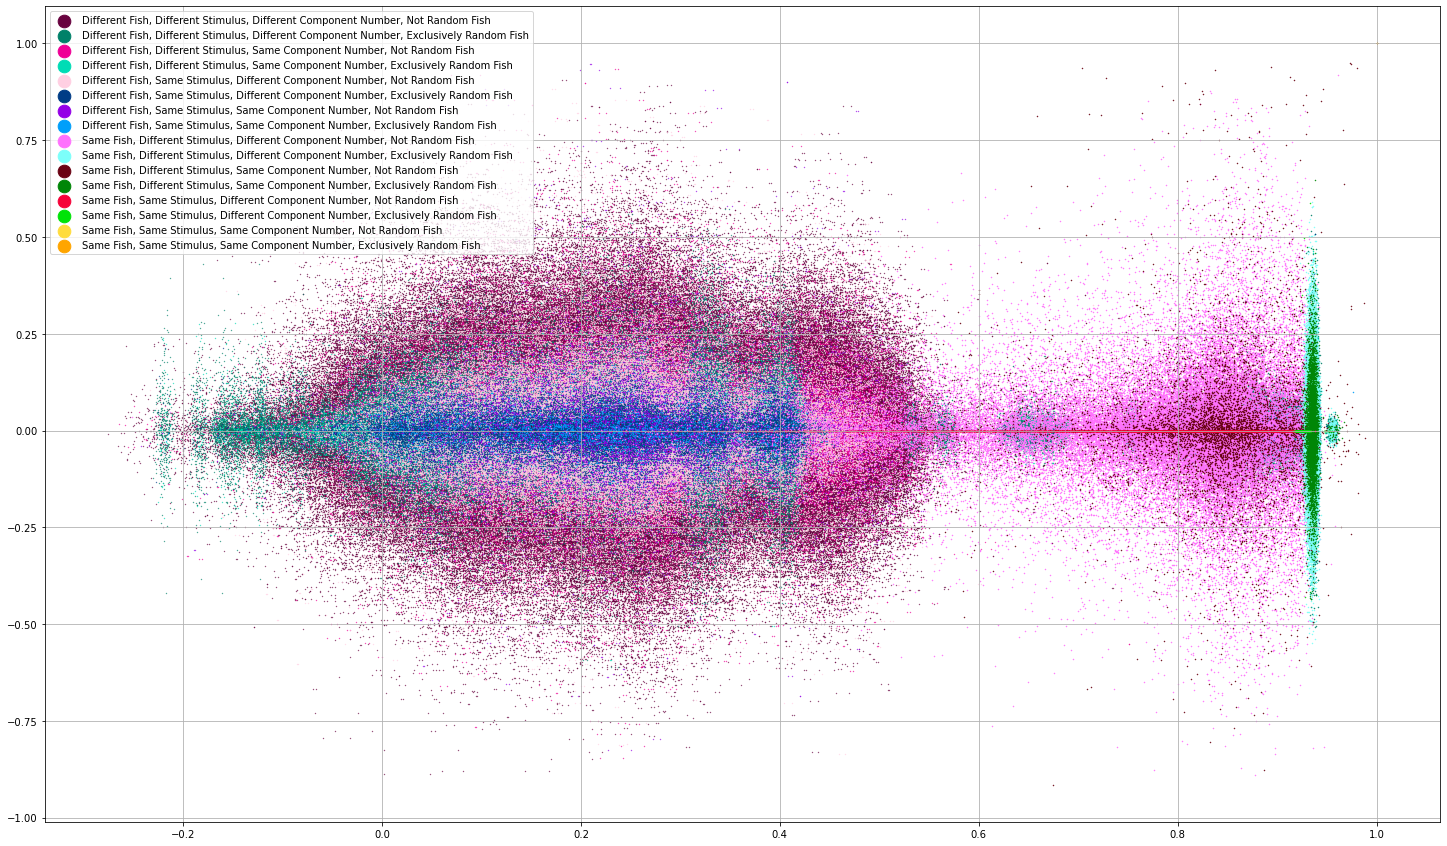

In [12]:
fig, ax = plt.subplots(figsize=(25,15))
plot_df_list = []
for group in result_df.groupby(['Same Fish', 'Same Stimulus', 'Same Component', 'Random Fish']):
    x=group[1]['geo_corr']
    y=group[1]['func_corr']
    ax.scatter(x, y, s=0.1, label=fish_name(*group[0]))
    plot_df_list.append({
        'fish': group[0][0],
        'stim': group[0][1],
        'comp': group[0][2],
        'rand': group[0][3],
        'name': fish_name(*group[0]),
        'x': group[1]['geo_corr'],
        'y': group[1]['func_corr']
    })
ax.legend(markerscale=40, loc = 'upper left')
ax.grid(True)

plt.show()

In [13]:
plotting_df = pd.DataFrame(plot_df_list)

In [14]:
def show_row_graphs(row_id):
    row = result_df.loc[row_id]
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}],
               [{"colspan": 2}, None]],
        subplot_titles=(
            f"Component Loadings of Neurons in {row['subject_1']} Stimulus {row['stimulus_1']} Component {row['component_1']}",
            f"Component Loadings of Neurons in {row['subject_2']} Stimulus {row['stimulus_2']} Component {row['component_2']}",
            "Component Function Values over Time"))
    fig.add_trace(row['3d_plot'], row=1, col=1)
    fig.add_trace(row['3d_plot_2'], row=1, col=2)
    fig.add_trace(row['function_plot'], row=2, col=1)
    fig.add_trace(row['function_plot_2'], row=2, col=1)
    fig.show()

In [ ]:
show_row_graphs(392336) #This will show interactive 3D renderings of component loadings and their timeseries functions

## Random Fish Checks
Compares each random fish data subset to that which does not include random fish comparisons

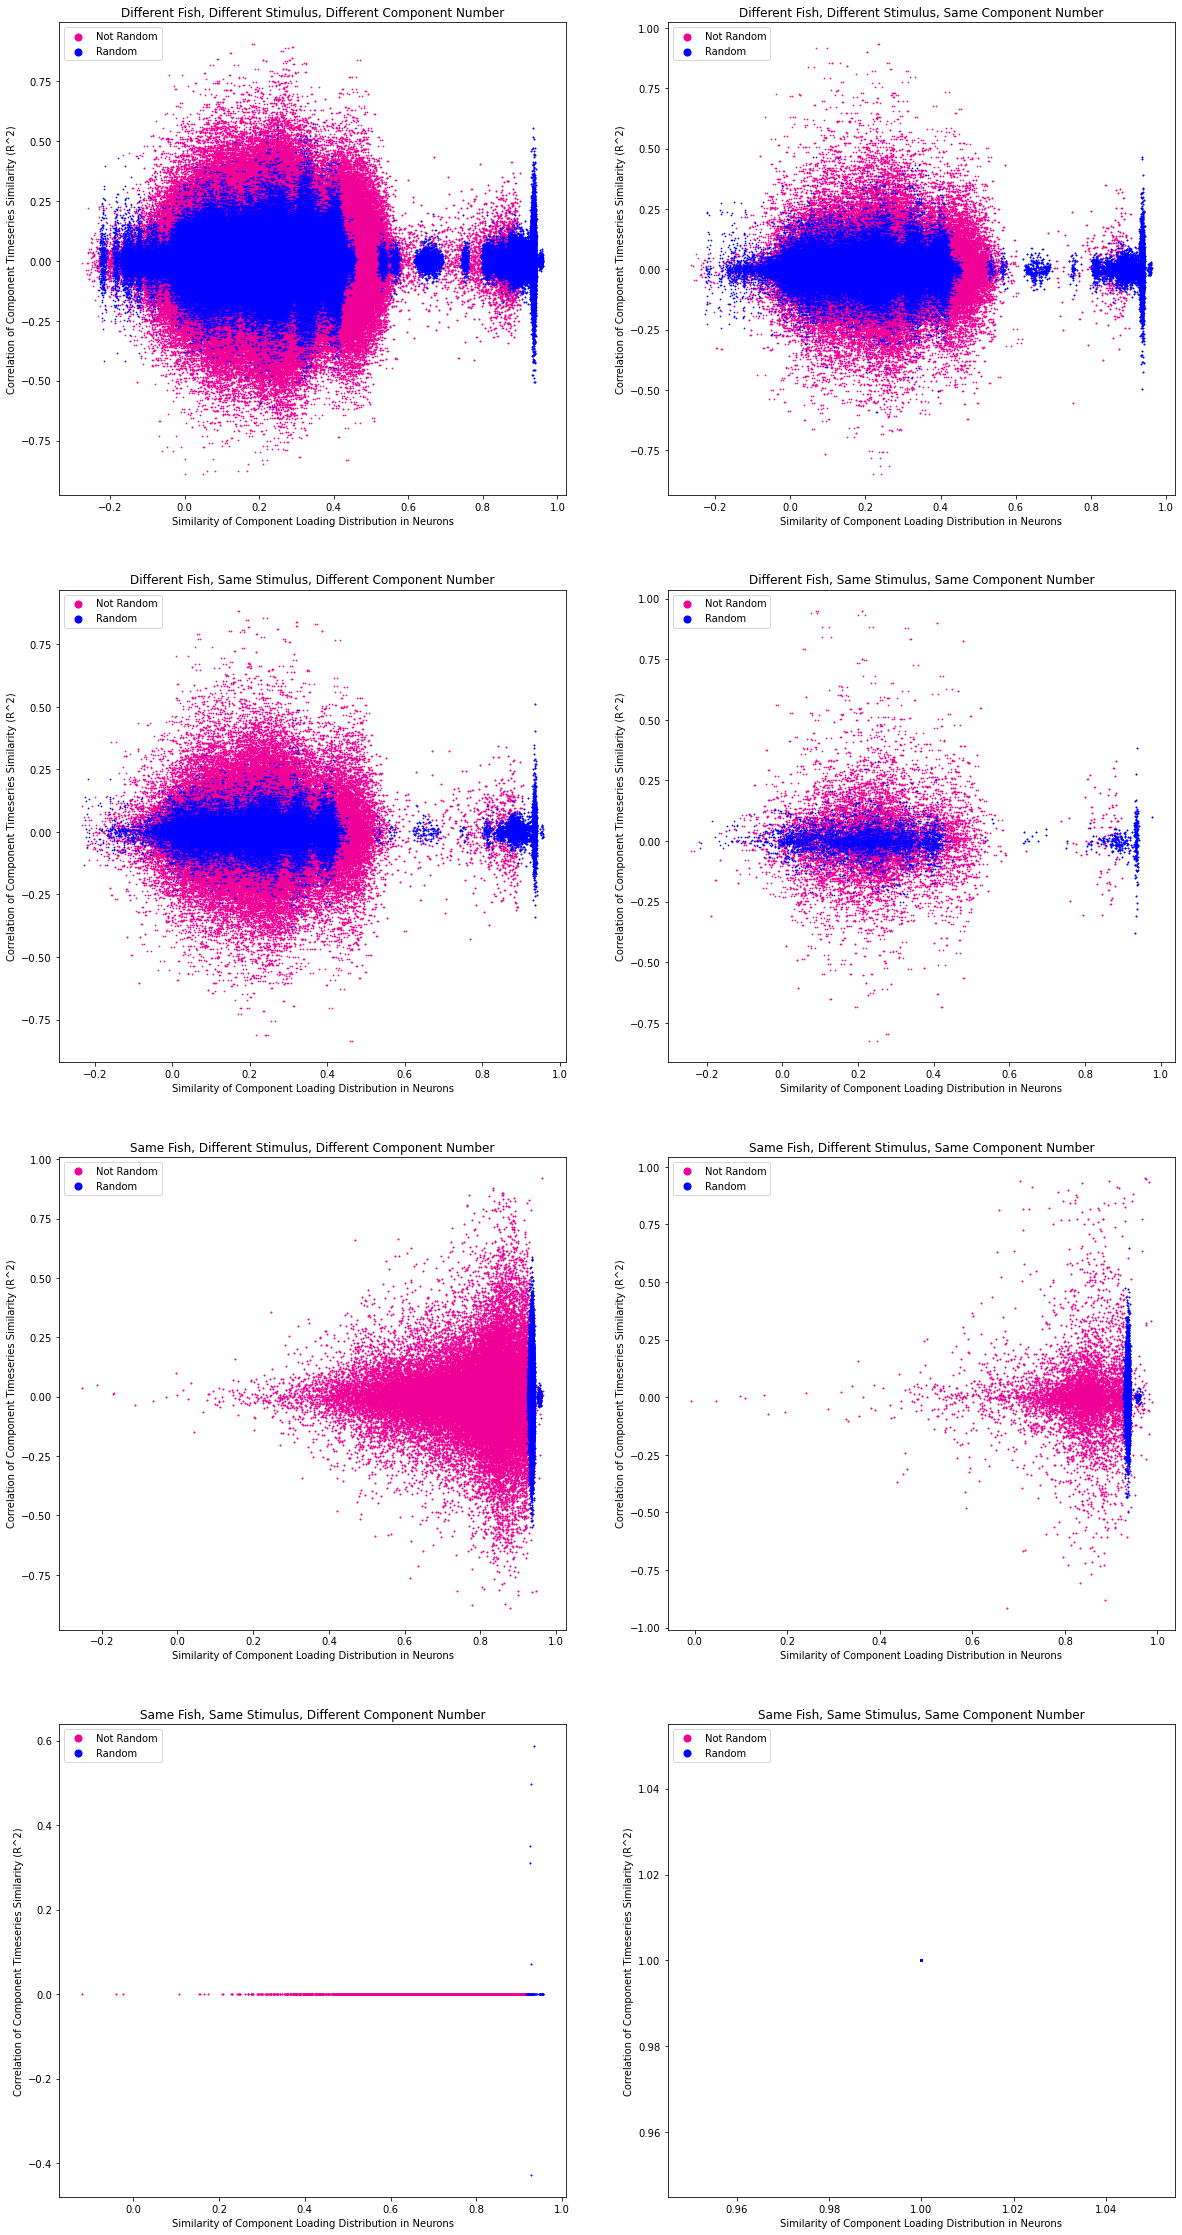

In [16]:
fig, axes = plt.subplots(4,2,figsize=(20,40), squeeze=False)
axes = axes.flatten()
counter = 0
for dataset in plotting_df[plotting_df.rand].itertuples():
    axis = axes[counter]
    counter+=1
    dataset_unrandom = plotting_df[
        (plotting_df['fish'] == dataset.fish) &
        (plotting_df['stim'] == dataset.stim) &
        (plotting_df['comp'] == dataset.comp) &
        (plotting_df['rand'] != dataset.rand)
    ]
    axis.scatter(
        x=dataset_unrandom.iat[0,5],
        y=dataset_unrandom.iat[0,6],
        s=.5,
        c='#EF0096',
        label='Not Random'
    )
    axis.scatter(
        x=dataset.x,
        y=dataset.y,
        s=.5,
        c='blue',
        label='Random'
    )
    axis.legend(markerscale=10, loc = 'upper left')
    axis.set_xlabel('Similarity of Component Loading Distribution in Neurons')
    axis.set_ylabel('Correlation of Component Timeseries Similarity (R^2)')
    axis.set_title(dataset.name.split(", Exclusively")[0])